<a href="https://colab.research.google.com/github/oms77/Reopen/blob/main/kidney_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
obj_df = df.select_dtypes(include="object")
num_df = df.select_dtypes(exclude="object")

In [ ]:
from sklearn.impute import SimpleImputer , KNNImputer

si = SimpleImputer()
impute_data = si.fit_transform(num_df)
new_num = pd.DataFrame(impute_data,columns=num_df.columns)

In [ ]:
new_num

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2


In [ ]:
obj_df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
id = obj_df[obj_df['classification']=='ckd\t'].index

In [ ]:
obj_df = obj_df.drop(id)

In [ ]:
obj_df['classification'] = obj_df['classification'].replace(['ckd','notckd'],[0,1])

In [ ]:
obj_dum = pd.get_dummies(obj_df,drop_first=True)

In [ ]:
knn = KNNImputer(n_neighbors=3)
d = knn.fit_transform(obj_dum)
obj = pd.DataFrame(d,columns=obj_dum.columns)

In [ ]:
new_data = pd.concat([new_num,obj],axis=1)

In [ ]:
id1 = new_data[new_data['classification'].isnull()].index

In [ ]:
new_data = new_data.drop(id1)

In [ ]:
new_data.isnull().sum()

id            0
age           0
bp            0
sg            0
al            0
             ..
cad_no        0
cad_yes       0
appet_poor    0
pe_yes        0
ane_yes       0
Length: 209, dtype: int64

<Axes: xlabel='classification', ylabel='count'>

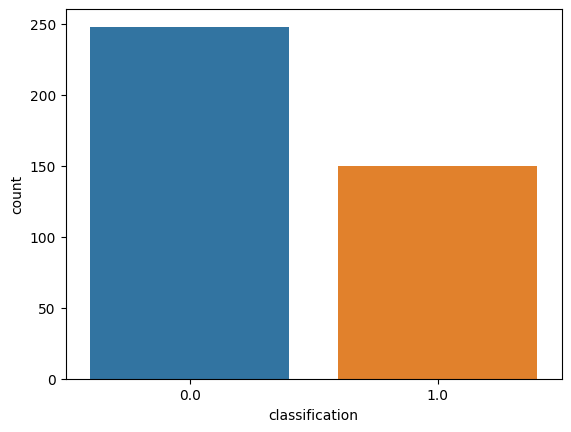

In [ ]:
sns.countplot(data=new_data,x='classification')

In [ ]:
def low(data,col):

  a = data.describe()[col][4]
  b = data.describe()[col][6]

  id = data[data[col]<a-(1.5*(b-a))].index
  if not id.empty:
    data = data.drop(id)
  else:
    pass

In [ ]:
def high(data,col):

  a = data.describe()[col][4]
  b = data.describe()[col][6]

  id = data[data[col]>b+(1.5*(b-a))].index
  if not id.empty:
    data = data.drop(id)
  else:
    pass

In [ ]:
arr = list(new_data.columns)

In [ ]:
for x in arr:

  low(new_data,x)

In [ ]:
new_data.shape

(398, 209)

In [ ]:
for x in arr:

  high(new_data,x)

In [ ]:
new_data.shape

(398, 209)

In [ ]:
new_data.head(10)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
0,0.0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,7.0,50.000000,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,3.0,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,4.0,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,5.0,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,6.0,68.0,70.000000,1.010,0.0,0.0,100.000000,54.0,24.0,104.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,7.0,24.0,76.469072,1.015,2.0,4.0,410.000000,31.0,1.1,137.528754,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,8.0,52.0,100.000000,1.015,3.0,0.0,138.000000,60.0,1.9,137.528754,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,9.0,53.0,90.000000,1.020,2.0,0.0,70.000000,107.0,7.2,114.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
x = new_data.drop('classification',axis=1)
y = new_data['classification']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from skopt import BayesSearchCV

xgb = XGBClassifier()

param_space = {
    'n_estimators': (50, 200),
    'max_depth': (1, 10),
    'learning_rate': (0.01, 1.0),
    'subsample': (0.1, 1.0),
    'max_leaves': (1, 10),
}

opt = BayesSearchCV(xgb,param_space,n_iter=50,cv=5,n_jobs=-1)

In [ ]:
opt.fit(x_train,y_train)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, predictor=None,
                                      random_state=None, ...),
              n_jobs=-1,
              search_spaces={'learning_rate': (0.01, 1.0), 'max_depth': (1, 10),
                             'max_leaves': (1, 10), 'n_estimators': (50, 200),
                             'subsample': (0.1, 1.0)})

In [ ]:
pre = opt.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report , auc

print(classification_report(y_test,pre))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        72
         1.0       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

